# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>


## Анализ временных рядов, часть 1


В данной задаче вы будете работать с данными температуре воздуха. Таблица содержит данные погоды примерно за 5 лет для городов США, Канады и Израиля.
Файл `temperature.csv` содержит температуру в градусах Кельвина.




In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

Загрузите таблицу. Обратиет внимание на параметр `parse_dates`, он используется для приведения столбца с датами к правильному типу данных.

In [61]:
df = pd.read_csv('temperature.csv', parse_dates=['datetime'])

Установим дату как индекс

In [62]:
df = df.set_index('datetime')
df.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,284.607306,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


Посмотрим, как выглядят наши данные.

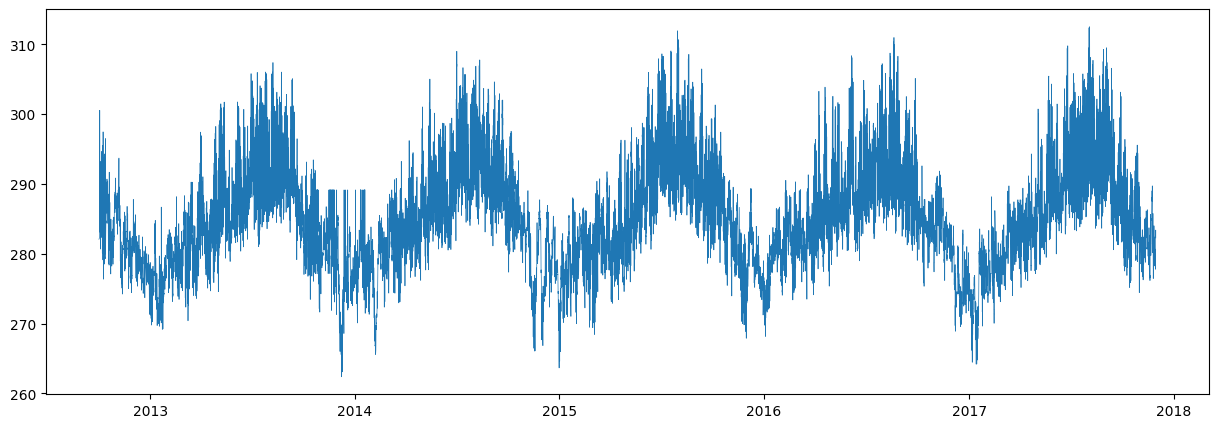

In [63]:
plt.figure(figsize=(15,5))
plt.plot(df['Portland'], lw=0.5);

Какие закономерности вы видите на графике?

**Ответ:**

Данные представляют собой циклически повторяющиеся значения. В начале каждого года температура достигает своего минимума, а к середине года достигает максимума. Температурные показатели остаются в пределах определенного диапазона и повторяются из года в год. Таким образом, для прогнозирования таких данных можно применять решающие деревья и случайный лес.





Посчитайте пропуски для каждого из городов.

In [64]:
df.isna().sum()

Vancouver            795
Portland               1
San Francisco        793
Seattle                3
Los Angeles            3
San Diego              1
Las Vegas              1
Phoenix                3
Albuquerque            1
Denver                 1
San Antonio            1
Dallas                 4
Houston                3
Kansas City            1
Minneapolis           13
Saint Louis            1
Chicago                3
Nashville              2
Indianapolis           7
Atlanta                6
Detroit                1
Jacksonville           1
Charlotte              3
Miami                805
Pittsburgh             3
Toronto                1
Philadelphia           3
New York             793
Montreal               3
Boston                 3
Beersheba            798
Tel Aviv District    793
Eilat                792
Haifa                798
Nahariyya            797
Jerusalem            793
dtype: int64

Выберите город с наименьшим количеством пропусков. Назовем этот город X.

In [65]:
X = df['Detroit']
X.head()

datetime
2012-10-01 12:00:00           NaN
2012-10-01 13:00:00    284.030000
2012-10-01 14:00:00    284.069789
2012-10-01 15:00:00    284.173965
2012-10-01 16:00:00    284.278140
Name: Detroit, dtype: float64

Если данные имеют пропуски в начале или в конце, то лучше обрезать данные. Остальные пропуски стоит заполнить предыдущим значением по дате. Для этого вам может помочь функция `pandas.DataFrame.fillna`.

In [66]:
X = X.iloc[1:]
X.shape

(45252,)

Для города X будем предсказывать температуру с помощью моделей машинного обучения.


Разбейте данные на обучение и тест. Для тестовой выборки используйте последние **365 дней** из данных (не забывайте, что в данных представлены показатели за каждый час).


In [67]:
train = X[:-365*24]
test = X[-365*24:]
assert train.shape[0] + test.shape[0] == X.shape[0]

С форматом даты модели работать не умеют, поэтому нам необходимо описать дату признаками. Сделаем преобразование даты в признаки.

In [68]:
def create_date_features(date):
    """Создает фичи из даты"""
    row = {}
    row["dayofweek"] = date.dayofweek
    row["quarter"] = date.quarter
    row["month"] = date.month
    row["year"] = date.year
    row["dayofyear"] = date.dayofyear
    row["dayofmonth"] = date.day
    row["weekofyear"] = date.weekofyear
    return row

def create_only_date_train_features(y_series):
    """
    Создает обучающий датасет из признаков, полученных из дат для y_series
    """
    time_features = pd.DataFrame(
    [create_date_features(date) for date in y_series.index] )
    return time_features, y_series

In [69]:
X_train, y_train = create_only_date_train_features(train)
X_test, y_test = create_only_date_train_features(test)

In [70]:
X_train

,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,0,4,10,2012,275,1,40
1,0,4,10,2012,275,1,40
2,0,4,10,2012,275,1,40
3,0,4,10,2012,275,1,40
4,0,4,10,2012,275,1,40
...,...,...,...,...,...,...,...
36487,1,4,11,2016,334,29,48
36488,1,4,11,2016,334,29,48
36489,1,4,11,2016,334,29,48
36490,1,4,11,2016,334,29,48


Постройте и обучите три модели:
* модель линейной регрессии
* решающего дерева
* случайного леса.

In [82]:
lr = LinearRegression()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()

models = [(lr, 'Linear Regression'), (tree, 'Decision Tree'), (forest, 'Random Forest')]

for model, i in models:
    model.fit(X_train, y_train)

Посчитайте качество на тесте (MSE, MAE, MAPE).



In [84]:
y_preds = []

for model, name in models:
    y_pred = model.predict(X_test)
    y_preds.append(y_pred)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    print(f'{name}')
    print(f'MSE: {mse.round(3)}')
    print(f'MAE: {mae.round(3)}')
    print(f'MAPE: {mape.round(3)}')
    print()

Linear Regression
MSE: 100.647
MAE: 7.97
MAPE: 0.029

Decision Tree
MSE: 52.939
MAE: 5.744
MAPE: 0.02

Random Forest
MSE: 50.256
MAE: 5.58
MAPE: 0.02



Визуализируйте результат.

In [85]:
def plot_results(y_to_train, y_to_test, y_forecast, model_name):
    """
    Функция для визуализации временного ряда и предсказания.
    Параметры:
        - y_to_train: pd.Series
            Временной ряд, на котором обучалась модель.
        - y_to_test: pd.Series
            Временной ряд, который предсказывает модель.
        - y_forecast: array
            Предсказания модели.
        - plot_conf_int: bool
            Надо ли строить предсказательного интервал.
        - left_bound: array
            Левая граница предсказательного интервала.
        - right_bound: array
            Правая граница предсказательного интервала.
    """
    plt.figure(figsize=(15, 5))
    plt.title(f"Показатели температуры для города Х \n {model_name}", fontsize=15)
    plt.plot(y_to_train, label="train")
    plt.plot(y_to_test, label="test")
    plt.plot(y_to_test.index, y_forecast, label="prediction")
    plt.legend()
    plt.show()

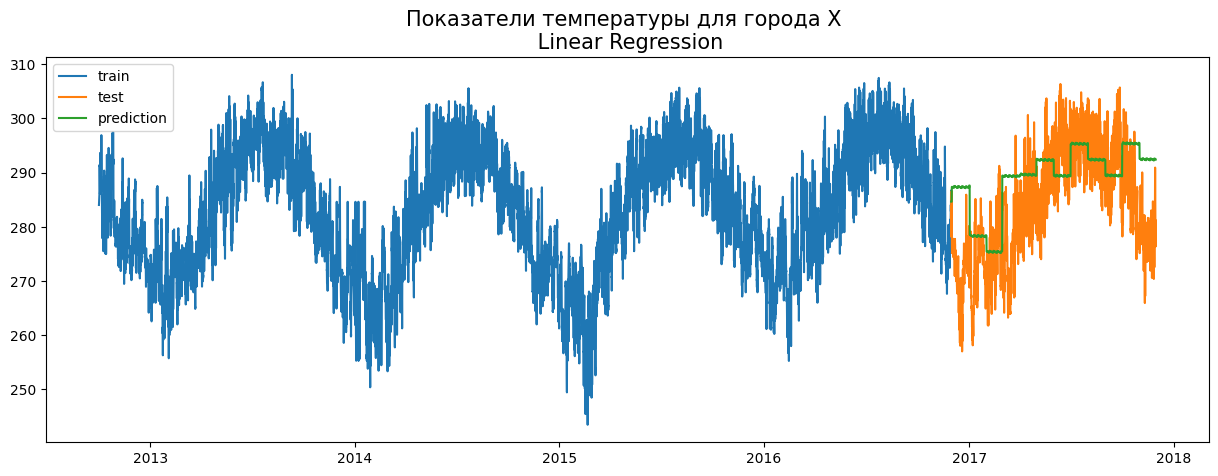

In [86]:
plot_results(y_train, y_test, y_preds[0], models[0][1])

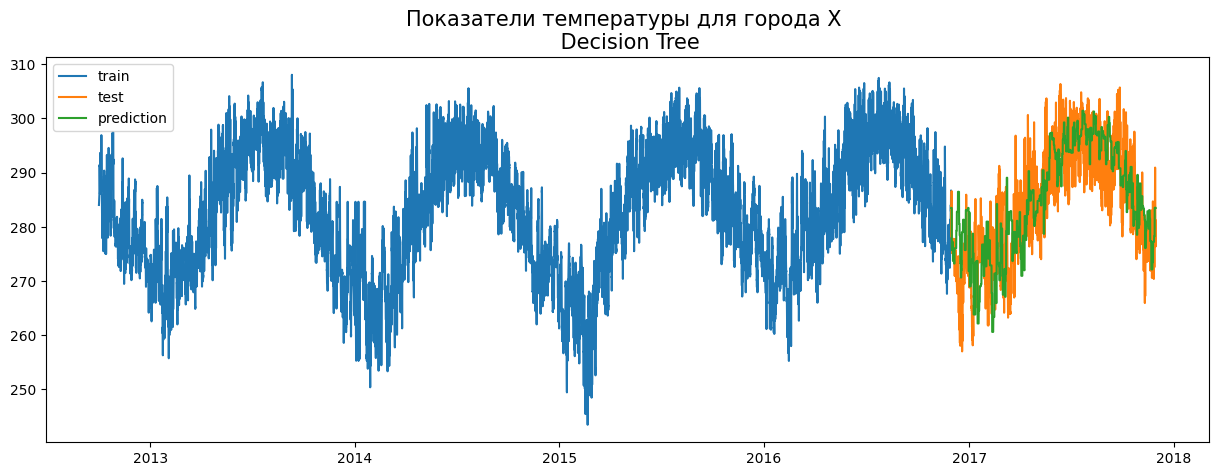

In [89]:
plot_results(y_train, y_test, y_preds[1], models[1][1])

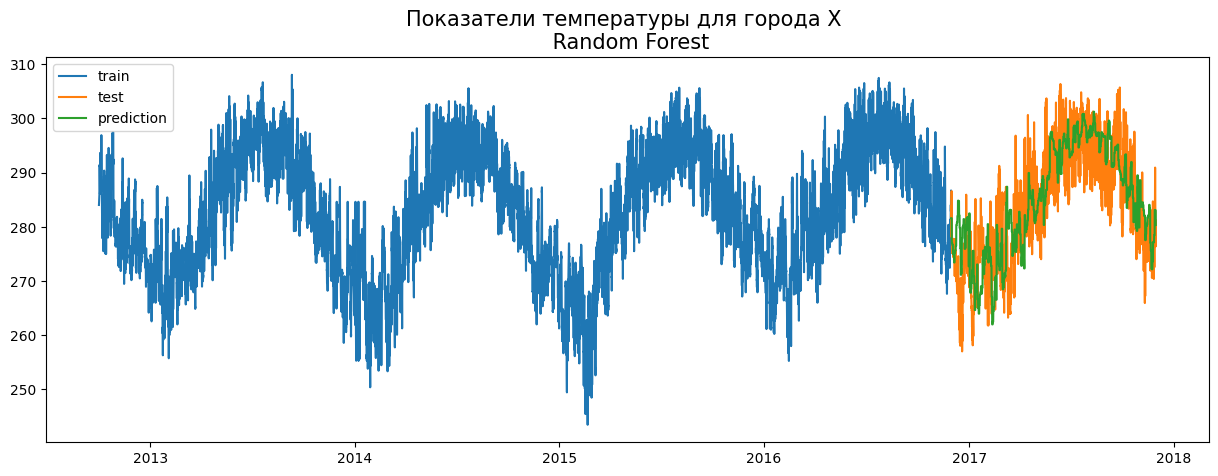

In [90]:
plot_results(y_train, y_test, y_preds[2], models[2][1])

Сделайте выводы.

**Вывод:**

На метриках видно, что линейная регрессия показывает наихудшие результаты. Решающее дерево и случайный лес демонстрируют схожие показатели по метрикам и визуально на графике проявляют схожее поведение. Единственное различие заключается в том, что случайный лес выглядит немного более точным и лучше согласуется с реальными данными. В общем, можно сказать, что дерево и лес достаточно неплохо моделируют реальные данные.